# RDKit descriptors for calculating aquatic toxicity LD50

### Test with Feature Selection and Feature Importance

## **Model optimized with Optuna and Cross-validation**

Adjust notebook configuration for... GPU 4 RAM high


descriptors "aquatic_tox_final.csv"**



In [ ]:
# carregar matriz geral de dados
import io
import pandas as pd

from google.colab import files

uploaded = files.upload()

# Get the actual filename from the uploaded dictionary keys
filename = list(uploaded.keys())[0]  # Assuming only one file is uploaded

# Use the correct filename to read the CSV
data = pd.read_csv(io.BytesIO(uploaded[filename]), sep=";", decimal=",", header=0, encoding='latin1')

Saving aquat_tox_final.csv to aquat_tox_final.csv


In [ ]:
# matriz
data

,SMILES,pLD50,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CC1(C)[C@@H](/C=C(\Cl)C(F)(F)F)[C@H]1C(=O)O[C@...,4.455932,13.645096,13.645096,0.905788,-5.749409,0.469388,36.677419,449.856,430.704,...,0,0,0,0,0,0,0,0,0,0
1,CCOP(=S)(OCC)SCSC(C)(C)C,2.397940,8.122459,8.122459,0.641736,-5.186635,0.505229,40.933333,288.440,267.272,...,1,0,0,0,0,0,0,0,0,0
2,CCCC[Sn](CCCC)(CCCC)O[Sn](CCCC)(CCCC)CCCC,2.119186,12.014988,9.512798,5.050126,-12.014988,0.127319,54.666667,596.117,541.685,...,0,0,0,0,0,0,0,0,0,0
3,O=C(NC(=O)c1ccccc1Cl)Nc1ccc(OC(F)(F)F)cc1,1.677781,12.556250,12.556250,0.483522,-5.386803,0.863695,16.666667,358.703,348.623,...,0,0,0,0,0,0,0,0,0,1
4,CCOP(=S)(CC)Sc1ccccc1,1.552842,7.956039,7.956039,0.061528,-4.774436,0.722425,34.428571,246.337,231.217,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,CCC(CC)c1cccc(OC(=O)NC)c1,1.337242,12.039495,12.039495,0.721095,-4.180552,0.846674,32.375000,221.300,202.148,...,0,0,0,0,0,0,0,0,0,0
2095,CNCCC(Oc1ccc(C(F)(F)F)cc1)c1ccccc1,-0.295787,13.399967,13.399967,0.940717,-5.443663,0.851796,28.181818,309.331,291.187,...,0,0,0,0,0,0,0,0,0,0
2096,Cc1cnc(C2=NC(=O)C(C)(C(C)C)N2)c(C(=O)O)c1,-1.994317,13.129906,13.129906,0.564460,-4.259278,0.869110,37.600000,275.308,258.172,...,0,0,0,0,0,0,0,0,0,0
2097,C1COCO1,-4.000000,6.848958,6.848958,2.687500,-2.739583,0.402086,72.000000,74.079,68.031,...,0,0,0,0,0,0,0,0,0,0


# *Removendo linhas (celula em branco) onde não foi feito o calculo do descriptor*

In [ ]:
print(data.columns)

Index(['SMILES', 'pLD50', 'MaxAbsEStateIndex', 'MaxEStateIndex',
       'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS', 'MolWt',
       'HeavyAtomMolWt',
       ...
       'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene',
       'fr_tetrazole', 'fr_thiazole', 'fr_thiocyan', 'fr_thiophene',
       'fr_unbrch_alkane', 'fr_urea'],
      dtype='object', length=219)


In [ ]:
# Remove rows with null values in 'num'
df_remove = data.loc[data['SMILES'].isnull()]
data2 = data.drop(df_remove.index)

# Convert non-numeric values to NaN
for col in data2.columns:
    data2[col] = pd.to_numeric(data2[col], errors='coerce')

# Drop columns with a high percentage of missing values (e.g., > 50%)
threshold = 0.5 * len(data2)
data2 = data2.dropna(axis=1, thresh=threshold)

print(f"Number of rows after removing rows with null 'num' and columns with too many missing values: {len(data2)}")
print(f"Number of columns after removing columns with too many missing values: {len(data2.columns)}")

Number of rows after removing rows with null 'num' and columns with too many missing values: 2099
Number of columns after removing columns with too many missing values: 218


In [ ]:
data2

,pLD50,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,4.455932,13.645096,13.645096,0.905788,-5.749409,0.469388,36.677419,449.856,430.704,449.100556,...,0,0,0,0,0,0,0,0,0,0
1,2.397940,8.122459,8.122459,0.641736,-5.186635,0.505229,40.933333,288.440,267.272,288.044129,...,1,0,0,0,0,0,0,0,0,0
2,2.119186,12.014988,9.512798,5.050126,-12.014988,0.127319,54.666667,596.117,541.685,598.221856,...,0,0,0,0,0,0,0,0,0,0
3,1.677781,12.556250,12.556250,0.483522,-5.386803,0.863695,16.666667,358.703,348.623,358.033205,...,0,0,0,0,0,0,0,0,0,1
4,1.552842,7.956039,7.956039,0.061528,-4.774436,0.722425,34.428571,246.337,231.217,246.030194,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,1.337242,12.039495,12.039495,0.721095,-4.180552,0.846674,32.375000,221.300,202.148,221.141579,...,0,0,0,0,0,0,0,0,0,0
2095,-0.295787,13.399967,13.399967,0.940717,-5.443663,0.851796,28.181818,309.331,291.187,309.134049,...,0,0,0,0,0,0,0,0,0,0
2096,-1.994317,13.129906,13.129906,0.564460,-4.259278,0.869110,37.600000,275.308,258.172,275.126991,...,0,0,0,0,0,0,0,0,0,0
2097,-4.000000,6.848958,6.848958,2.687500,-2.739583,0.402086,72.000000,74.079,68.031,74.036779,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = data2.drop(['pLD50'], axis=1) # gerando a matriz X a partir da planilha

In [ ]:
# autoescalonamento da matriz de entrada

import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)
X2 = pd.DataFrame(scaler.fit_transform(X))   # X

In [ ]:
# Fit the selector to your data
saida = data2['pLD50']


In [ ]:
print(X.shape)

(2099, 217)


# **Feature selection**

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

In [ ]:
feature_selection_estimator = RandomForestRegressor()  # definir o estimador

In [ ]:
# Create a SelectFromModel object
selector = SelectFromModel(estimator=feature_selection_estimator, threshold='median')  # You can adjust the threshold as needed

The threshold parameter determines the criteria for feature selection. Here, 'median' selects features with importance weights greater than or equal to the median.

In [ ]:
# autoescalonamento da matriz de entrada

import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)
X2 = pd.DataFrame(scaler.fit_transform(X))   # X

In [ ]:
# Fit the selector to your data

selector.fit(X2, saida)  # Assuming 'saida' is your target variable

SelectFromModel(estimator=RandomForestRegressor(), threshold='median')

In [ ]:
# Get the selected features:
selected_features = X2.columns[selector.get_support()]

In [ ]:
#Create a new dataframe with only the selected features:
X_selected = X.iloc[:, selector.get_support()]

In [ ]:
X_selected

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,Phi,MolLogP,MolMR,fr_Ar_COO,fr_COO,fr_COO2,fr_allylic_oxid,fr_halogen,fr_ketone,fr_para_hydroxylation
0,13.645096,13.645096,0.905788,-5.749409,0.469388,36.677419,449.856,430.704,449.100556,162,...,2.372123,6.54398,108.1560,0,0,0,2,4,0,1
1,8.122459,8.122459,0.641736,-5.186635,0.505229,40.933333,288.440,267.272,288.044129,92,...,1.454986,4.50630,77.3390,0,0,0,0,0,0,0
2,12.014988,9.512798,5.050126,-12.014988,0.127319,54.666667,596.117,541.685,598.221856,164,...,2.214189,9.69460,130.8830,0,0,0,0,0,0,0
3,12.556250,12.556250,0.483522,-5.386803,0.863695,16.666667,358.703,348.623,358.033205,126,...,2.523048,4.20050,81.0619,0,0,0,0,4,0,0
4,7.956039,7.956039,0.061528,-4.774436,0.722425,34.428571,246.337,231.217,246.030194,78,...,1.222449,4.14460,68.7510,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,12.039495,12.039495,0.721095,-4.180552,0.846674,32.375000,221.300,202.148,221.141579,88,...,0.904493,3.30840,64.8487,0,0,0,0,0,0,0
2095,13.399967,13.399967,0.940717,-5.443663,0.851796,28.181818,309.331,291.187,309.134049,118,...,1.576248,4.43500,79.7987,0,0,0,0,3,0,0
2096,13.129906,13.129906,0.564460,-4.259278,0.869110,37.600000,275.308,258.172,275.126991,106,...,0.916825,1.37932,73.8560,1,1,1,0,0,0,0
2097,6.848958,6.848958,2.687500,-2.739583,0.402086,72.000000,74.079,68.031,74.036779,30,...,0.175083,-0.00930,16.7710,0,0,0,0,0,0,0


In [ ]:
# autoescalonamento da matriz de entrada

import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)
X_selected2 = pd.DataFrame(scaler.fit_transform(X_selected))   # X

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected2, saida, test_size=0.25, random_state=13)

#X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.10, random_state=13)

# testando modelo Regressor

Modelo Extra Tree Regressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor


from sklearn.metrics import mean_absolute_error, r2_score

reg = ExtraTreesRegressor(n_estimators=200, min_samples_split=3, min_samples_leaf=2,
                          max_features=0.9, random_state=42)


reg.fit(X_train, y_train)


y_predc = reg.predict(X_train)
y_pred = reg.predict(X_test)


# STEP 5: Evaluate only on actual toxic samples
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2cal = r2_score(y_train, y_predc) # Evaluate on the regression training set

print(f"Two-Stage Model (Evaluated on Actual Toxic Samples) - MAE: {mae:.2f}")
print(f"Two-Stage Model (Evaluated on Actual Toxic Samples) - R²: {r2:.4f}")
print(f"Regression Model (Calibration) - R²: {r2cal:.4f}")

Two-Stage Model (Evaluated on Actual Toxic Samples) - MAE: 0.69
Two-Stage Model (Evaluated on Actual Toxic Samples) - R²: 0.6397
Regression Model (Calibration) - R²: 0.9817


Text(0.5, 0, 'y actual')

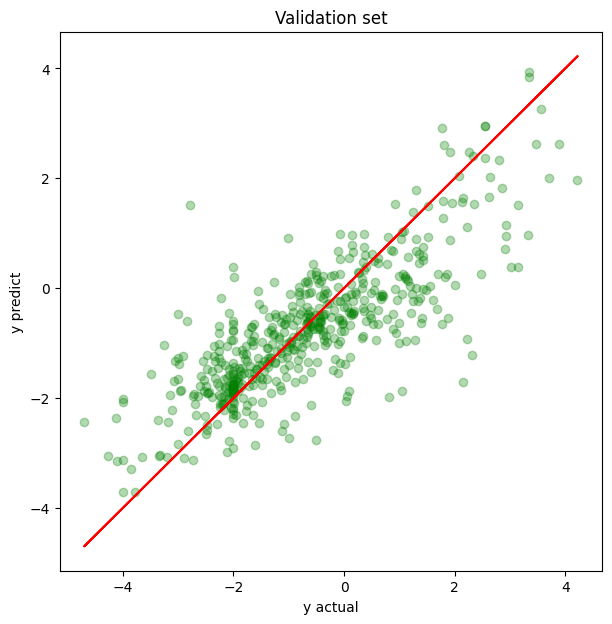

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7, 7))  # tamanho do gráfico
plt.scatter(x=y_test, y=y_pred, c='green' ,alpha=0.3) # dispersão dos dados

z = np.polyfit(y_test, y_test, 1)  #linha vermelha de referência - parte 1
p = np.poly1d(z)  # equação da linha - parte 2

plt.plot(y_test, p(y_test), 'red')  # cor da linha e geraçao da mesma
plt.title('Validation set')
plt.ylabel('y predict')
plt.xlabel('y actual')

Text(0.5, 0, 'y actual')

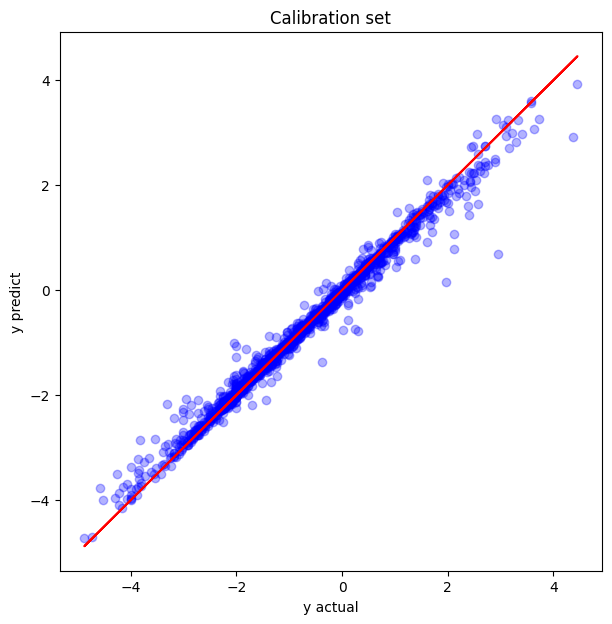

In [ ]:
plt.figure(figsize=(7, 7))  # tamanho do gráfico
plt.scatter(x=y_train, y=y_predc, c='blue' ,alpha=0.3) # dispersão dos dados

z = np.polyfit(y_train, y_train, 1)  #linha vermelha de referência - parte 1
p = np.poly1d(z)  # equação da linha - parte 2

plt.plot(y_train, p(y_train), 'red')  # cor da linha e geraçao da mesma
plt.title('Calibration set')
plt.ylabel('y predict')
plt.xlabel('y actual')

# Feature importance

In [ ]:
from sklearn.inspection import permutation_importance

# Compute permutation importance on validation data
result = permutation_importance(
    reg, X_test, y_test,          # procedimento testado com os conjunto X_test e y_test
    n_repeats=20,              # how many times to permute
    random_state=42,
    scoring='r2'               # R2 score
)

MolLogP - 100 -Importance: 0.0495
BCUT2D_LOGPHI - 21 -Importance: 0.0233
PEOE_VSA6 - 54 -Importance: 0.0176
fr_COO2 - 104 -Importance: 0.0166
fr_COO - 103 -Importance: 0.0147
FractionCSP3 - 93 -Importance: 0.0124
NumHDonors - 96 -Importance: 0.0117
VSA_EState9 - 92 -Importance: 0.0082
SlogP_VSA4 - 71 -Importance: 0.0072
Chi0v - 30 -Importance: 0.0070
SlogP_VSA12 - 68 -Importance: 0.0065
MolMR - 101 -Importance: 0.0065
BCUT2D_CHGHI - 19 -Importance: 0.0062
Chi1v - 33 -Importance: 0.0058
fr_ketone - 107 -Importance: 0.0047
NHOHCount - 94 -Importance: 0.0046
EState_VSA9 - 82 -Importance: 0.0046
ExactMolWt - 8 -Importance: 0.0046
fr_allylic_oxid - 105 -Importance: 0.0045
SMR_VSA3 - 61 -Importance: 0.0045
MolWt - 6 -Importance: 0.0042
SlogP_VSA2 - 69 -Importance: 0.0040
MinAbsEStateIndex - 2 -Importance: 0.0039
SMR_VSA4 - 62 -Importance: 0.0035
SMR_VSA10 - 59 -Importance: 0.0035
BCUT2D_LOGPLOW - 22 -Importance: 0.0034
PEOE_VSA12 - 48 -Importance: 0.0029
PEOE_VSA1 - 45 -Importance: 0.0029
BC

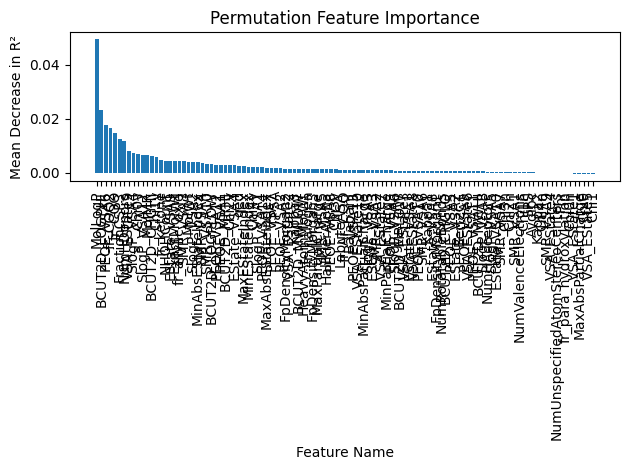

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sort by importance
sorted_idx = result.importances_mean.argsort()[::-1]

# Get the names of the selected features from X_selected
selected_feature_names = X_selected.columns

# Print top features with their names
for idx in sorted_idx:
    print(f"{selected_feature_names[idx]} - {idx} -Importance: {result.importances_mean[idx]:.4f}")


# Calculate and print the sum of all feature importances
total_importance = np.sum(result.importances_mean)
print(f"\nSum of all feature importances: {total_importance:.4f}")


# Optional: plot
# Use the number of selected features for the x-axis range
plt.bar(range(len(sorted_idx)), result.importances_mean[sorted_idx])
# Use the sorted indices themselves as labels for the x-axis ticks
plt.xticks(ticks=range(len(sorted_idx)), labels=selected_feature_names[sorted_idx], rotation=90)
plt.xlabel("Feature Name")
plt.ylabel("Mean Decrease in R²")
plt.title("Permutation Feature Importance")
plt.tight_layout()
plt.show()

## Select features

Create a new DataFrame containing only the desired columns from `X_selected`.


In [ ]:
selected_cols_subset = ['MolLogP', 'BCUT2D_LOGPHI', 'PEOE_VSA6', 'NumHDonors', 'fr_COO', 'fr_COO2', 'FractionCSP3', 'VSA_EState9',
                        'BCUT2D_CHGHI', 'SlogP_VSA4', 'Chi1v', 'Chi0v', 'SlogP_VSA12', 'MolMR', 'EState_VSA9',
                        'fr_ketone', 'EState_VSA4', 'MolWt', 'SMR_VSA3', 'SlogP_VSA2', 'MinAbsEStateIndex',
                        'fr_allylic_oxid', 'qed', 'BCUT2D_LOGPLOW', 'ExactMolWt', 'BCUT2D_MRHI',
                        'HeavyAtomMolWt', 'Chi3v', 'HallKierAlpha', 'TPSA', 'SMR_VSA10', 'PEOE_VSA12', 'PEOE_VSA2',
                        'PEOE_VSA1', 'VSA_EState10', 'MinPartialCharge', 'PEOE_VSA7', 'fr_Ar_COO', 'Chi4v',
                        'Kappa1', 'MinAbsPartialCharge', 'MaxAbsEStateIndex', 'VSA_EState2', 'EState_VSA3',
                        'SMR_VSA6', 'SlogP_VSA1', 'MinEStateIndex', 'fr_halogen', 'BertzCT', 'MaxAbsPartialCharge']
X_subset = X_selected[selected_cols_subset]

In [ ]:
# Find rows with NaN values in X_subset
rows_with_nan = X_subset.isnull().any(axis=1)

# Remove rows with NaN from X_subset and the corresponding rows in saida
X_subset_cleaned = X_subset[~rows_with_nan]
saida_cleaned = saida[~rows_with_nan]

print(f"Number of rows before removing NaNs: {len(X_subset)}")
print(f"Number of rows after removing NaNs: {len(X_subset_cleaned)}")

Number of rows before removing NaNs: 2099
Number of rows after removing NaNs: 2094


In [ ]:
# autoescalonamento da matriz de entrada

import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)
X_subset_cleaned2 = pd.DataFrame(scaler.fit_transform(X_subset_cleaned))   # X


Split the new DataFrame and the target variable (`saida`) into training and testing sets.


In [ ]:
from sklearn.model_selection import train_test_split

X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset_cleaned2, saida_cleaned, test_size=0.25, random_state=13)

In [ ]:
reg_subset = ExtraTreesRegressor(n_estimators=200, min_samples_split=3, min_samples_leaf=2,
                                 max_features=0.9, random_state=42)

reg_subset.fit(X_train_subset, y_train_subset)

ExtraTreesRegressor(max_features=0.9, min_samples_leaf=2, min_samples_split=3,
                    n_estimators=200, random_state=42)

In [ ]:
y_pred_subset = reg_subset.predict(X_test_subset)
y_predc_subset = reg_subset.predict(X_train_subset)

mae_subset = mean_absolute_error(y_test_subset, y_pred_subset)
r2_subset = r2_score(y_test_subset, y_pred_subset)
r2cal_subset = r2_score(y_train_subset, y_predc_subset)

print(f"ExtraTreesRegressor (Subset Features) - MAE: {mae_subset:.2f}")
print(f"ExtraTreesRegressor (Subset Features) - R² (Test): {r2_subset:.4f}")
print(f"ExtraTreesRegressor (Subset Features) - R² (Calibration): {r2cal_subset:.4f}")

ExtraTreesRegressor (Subset Features) - MAE: 0.72
ExtraTreesRegressor (Subset Features) - R² (Test): 0.6027
ExtraTreesRegressor (Subset Features) - R² (Calibration): 0.9754


## Visualize results




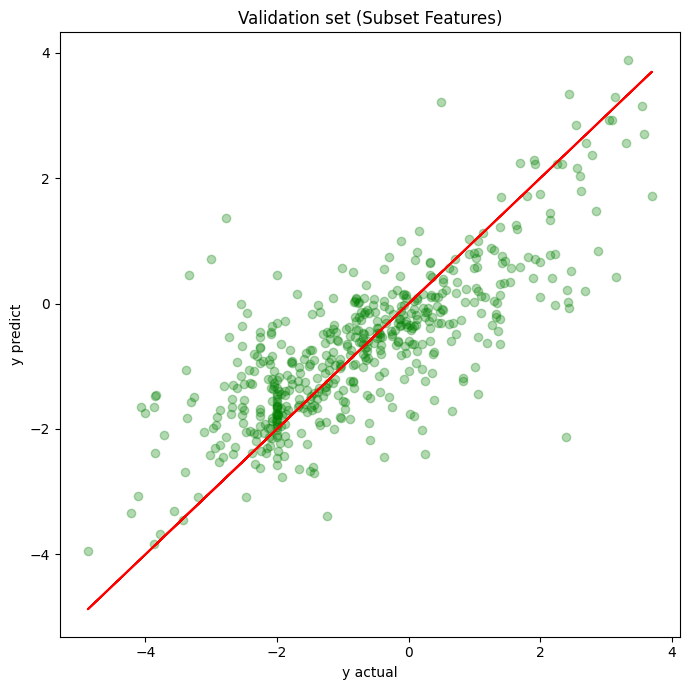

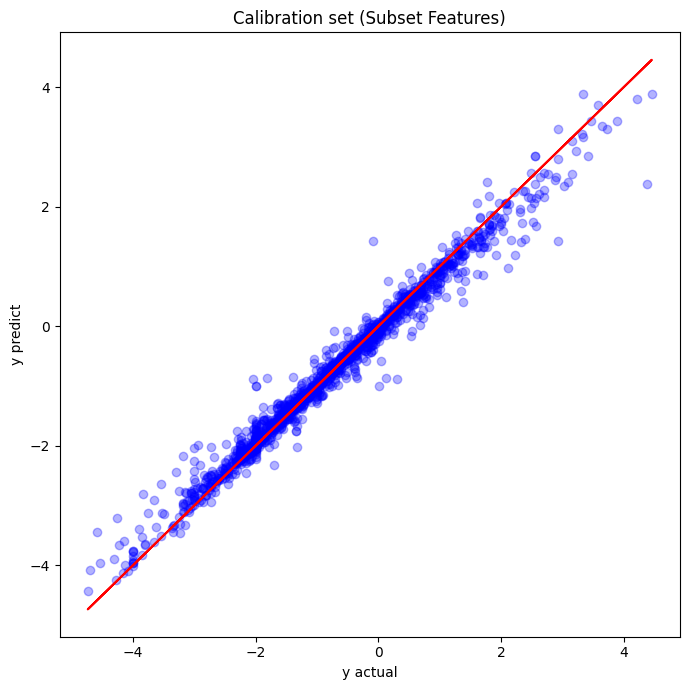

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(x=y_test_subset, y=y_pred_subset, c='green', alpha=0.3)
z = np.polyfit(y_test_subset, y_test_subset, 1)
p = np.poly1d(z)
plt.plot(y_test_subset, p(y_test_subset), 'red')
plt.title('Validation set (Subset Features)')
plt.ylabel('y predict')
plt.xlabel('y actual')
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 7))
plt.scatter(x=y_train_subset, y=y_predc_subset, c='blue', alpha=0.3)
z = np.polyfit(y_train_subset, y_train_subset, 1)
p = np.poly1d(z)
plt.plot(y_train_subset, p(y_train_subset), 'red')
plt.title('Calibration set (Subset Features)')
plt.ylabel('y predict')
plt.xlabel('y actual')
plt.tight_layout()
plt.show()

### Optimize the hyperparameters of an Extra Trees Regressor model using Optuna.

In [ ]:
%pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 16.1 MB/s eta 0:00:00


Define the objective function for Optuna to minimize, which trains an ExtraTreesRegressor and returns the negative R² score on the test set.



In [ ]:
import optuna
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score

def objective(trial):
    """
    Objective function for Optuna to optimize ExtraTreesRegressor hyperparameters.
    """
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_features = trial.suggest_float('max_features', 0.1, 1.0)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)

    reg = ExtraTreesRegressor(
        n_estimators=n_estimators,
        max_features=max_features,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1 # Use all available cores
    )

    reg.fit(X_train_subset, y_train_subset)
    y_pred_subset = reg.predict(X_test_subset)
    r2 = r2_score(y_test_subset, y_pred_subset)

    # Optuna minimizes the objective function, so return the negative R² score
    return -r2

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

print("Best trial:")
print(f"  Value: {study.best_trial.value:.4f}")
print("  Params: ")
for key, value in study.best_trial.params.items():
    print(f"    {key}: {value}")

[I 2025-11-05 18:37:42,162] A new study created in memory with name: no-name-b8870be4-9dd3-4bc7-901b-d053c0b2e224
[I 2025-11-05 18:37:42,261] Trial 0 finished with value: -0.5264272147234916 and parameters: {'n_estimators': 66, 'max_features': 0.41111068924446514, 'min_samples_split': 2, 'min_samples_leaf': 17}. Best is trial 0 with value: -0.5264272147234916.
[I 2025-11-05 18:37:42,685] Trial 1 finished with value: -0.5929116278438846 and parameters: {'n_estimators': 123, 'max_features': 0.7034615680305233, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 1 with value: -0.5929116278438846.
[I 2025-11-05 18:37:42,984] Trial 2 finished with value: -0.5493812811095957 and parameters: {'n_estimators': 219, 'max_features': 0.3878194460585416, 'min_samples_split': 6, 'min_samples_leaf': 11}. Best is trial 1 with value: -0.5929116278438846.
[I 2025-11-05 18:37:43,160] Trial 3 finished with value: -0.44601166216919796 and parameters: {'n_estimators': 148, 'max_features': 0.103165

Best trial:
  Value: -0.6134
  Params: 
    n_estimators: 495
    max_features: 0.9185491590667291
    min_samples_split: 6
    min_samples_leaf: 4


Instantiate and train a new ExtraTreesRegressor model using the best hyperparameters found by Optuna.



In [ ]:
# Access the best hyperparameters
best_params = study.best_trial.params

# Instantiate a new ExtraTreesRegressor model with the best hyperparameters
reg_optimized = ExtraTreesRegressor(
    n_estimators=best_params['n_estimators'],
    max_features=best_params['max_features'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Train the new model on the training data subset
reg_optimized.fit(X_train_subset, y_train_subset)

ExtraTreesRegressor(max_features=0.9185491590667291, min_samples_leaf=4,
                    min_samples_split=6, n_estimators=495, n_jobs=-1,
                    random_state=42)

Evaluate the performance of the optimized model



In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Make predictions on the test set
y_pred_optimized = reg_optimized.predict(X_test_subset)

# Make predictions on the training set for calibration R²
y_predc_optimized = reg_optimized.predict(X_train_subset)

# Calculate evaluation metrics
mae_optimized = mean_absolute_error(y_test_subset, y_pred_optimized)
r2_test_optimized = r2_score(y_test_subset, y_pred_optimized)
r2_cal_optimized = r2_score(y_train_subset, y_predc_optimized)

# Print the evaluation metrics
print(f"ExtraTreesRegressor (Optimized Features) - MAE (Test): {mae_optimized:.2f}")
print(f"ExtraTreesRegressor (Optimized Features) - R² (Test): {r2_test_optimized:.4f}")
print(f"ExtraTreesRegressor (Optimized Features) - R² (Calibration): {r2_cal_optimized:.4f}")

ExtraTreesRegressor (Optimized Features) - MAE (Test): 0.72
ExtraTreesRegressor (Optimized Features) - R² (Test): 0.6134
ExtraTreesRegressor (Optimized Features) - R² (Calibration): 0.8873


In [ ]:
from sklearn.metrics import mean_squared_error
import math

mset = mean_squared_error(y_test_subset, y_pred_optimized)
rmset = math.sqrt(mset)

print("The mean squared error (MSE) on test set: {:.4f}".format(mset))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmset))
'''
msev = mean_squared_error(y_validation, ypredv)
rmsev = math.sqrt(msev)
print('\n')
print("The mean squared error (MSE) on validation set: {:.4f}".format(msev))
print("The root mean squared error (RMSE) on validation set: {:.4f}".format(rmsev))
'''
msec = mean_squared_error(y_train_subset, y_predc_optimized)
rmsec = math.sqrt(msec)
print('\n')
print("The mean squared error (MSE) on training set: {:.4f}".format(msec))
print("The root mean squared error (RMSE) on training set: {:.4f}".format(rmsec))

The mean squared error (MSE) on test set: 0.9498
The root mean squared error (RMSE) on test set: 0.9746


The mean squared error (MSE) on training set: 0.2352
The root mean squared error (RMSE) on training set: 0.4850


In [ ]:
from sklearn.metrics import mean_absolute_error

maet = mean_absolute_error(y_test_subset, y_pred_optimized)
print("The mean absolute error (MAE) on test set: {:.4f}".format(maet))
maec = mean_absolute_error(y_train_subset, y_predc_optimized)
print('\n')
print("The mean absolute error (MAE) on training set: {:.4f}".format(maec))
#maev = mean_absolute_error(y_validation, ypredv)
print('\n')
#print("The mean absolute error (MAE) on validation set: {:.4f}".format(maev))

The mean absolute error (MAE) on test set: 0.7225


The mean absolute error (MAE) on training set: 0.3468




## Visualize results




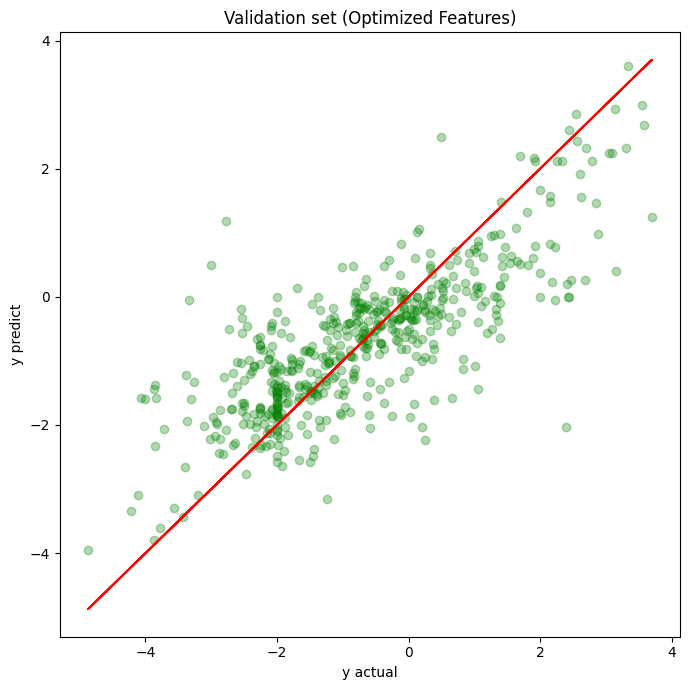

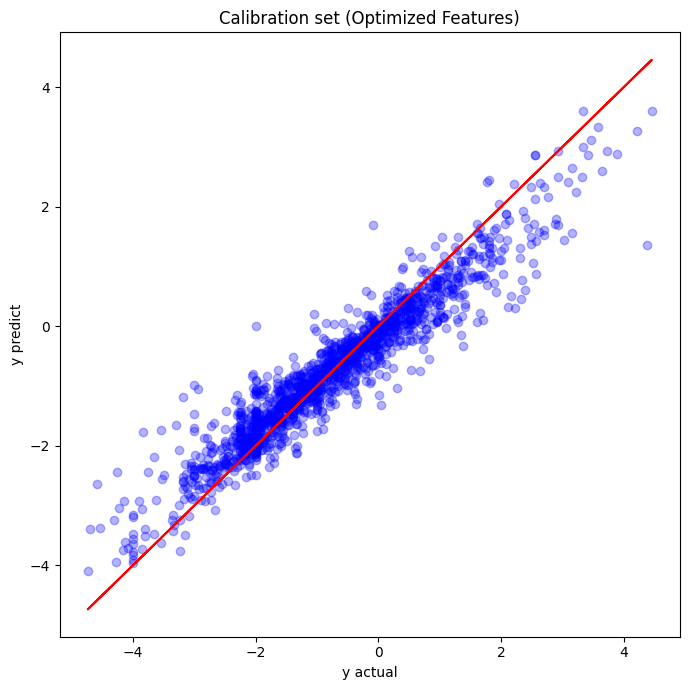

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7, 7))
plt.scatter(x=y_test_subset, y=y_pred_optimized, c='green', alpha=0.3)
z_test = np.polyfit(y_test_subset, y_test_subset, 1)
p_test = np.poly1d(z_test)
plt.plot(y_test_subset, p_test(y_test_subset), 'red')
plt.title('Validation set (Optimized Features)')
plt.ylabel('y predict')
plt.xlabel('y actual')
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 7))
plt.scatter(x=y_train_subset, y=y_predc_optimized, c='blue', alpha=0.3)
z_train = np.polyfit(y_train_subset, y_train_subset, 1)
p_train = np.poly1d(z_train)
plt.plot(y_train_subset, p_train(y_train_subset), 'red')
plt.title('Calibration set (Optimized Features)')
plt.ylabel('y predict')
plt.xlabel('y actual')
plt.tight_layout()
plt.show()

### #Optimize the hyperparameters of an Extra Trees Regressor model using Optuna with cross-validation.

In [ ]:
import optuna
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

def objective_cv(trial):
    """
    Objective function for Optuna to optimize ExtraTreesRegressor hyperparameters
    using cross-validation.
    """
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_features = trial.suggest_float('max_features', 0.1, 1.0)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)

    reg = ExtraTreesRegressor(
        n_estimators=n_estimators,
        max_features=max_features,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1 # Use all available cores
    )

    scores = cross_val_score(reg, X_train_subset, y_train_subset, cv=5, scoring='r2')
    mean_r2 = np.mean(scores)

    # Optuna minimizes the objective function, so return the negative mean R² score
    return -mean_r2

In [ ]:
study_cv = optuna.create_study(direction='minimize')
study_cv.optimize(objective_cv, n_trials=100)

print("Best trial (with CV):")
print(f"  Value: {study_cv.best_trial.value:.4f}")
print("  Params: ")
for key, value in study_cv.best_trial.params.items():
    print(f"    {key}: {value}")

[I 2025-11-05 18:38:53,415] A new study created in memory with name: no-name-c6d7c6c7-1761-4636-9f75-e0db72ba248a
[I 2025-11-05 18:39:00,566] Trial 0 finished with value: -0.5507771147376681 and parameters: {'n_estimators': 385, 'max_features': 0.8434571421391923, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 0 with value: -0.5507771147376681.
[I 2025-11-05 18:39:02,110] Trial 1 finished with value: -0.43606651088130627 and parameters: {'n_estimators': 257, 'max_features': 0.31157600852970546, 'min_samples_split': 9, 'min_samples_leaf': 20}. Best is trial 0 with value: -0.5507771147376681.
[I 2025-11-05 18:39:02,922] Trial 2 finished with value: -0.5091447113702255 and parameters: {'n_estimators': 121, 'max_features': 0.33816311249869824, 'min_samples_split': 11, 'min_samples_leaf': 7}. Best is trial 0 with value: -0.5507771147376681.
[I 2025-11-05 18:39:05,946] Trial 3 finished with value: -0.516951439491725 and parameters: {'n_estimators': 436, 'max_features': 0.97310

Best trial (with CV):
  Value: -0.5602
  Params: 
    n_estimators: 273
    max_features: 0.3381777394019262
    min_samples_split: 6
    min_samples_leaf: 1


In [ ]:
# Access the best hyperparameters from the cross-validation study
best_params_cv = study_cv.best_trial.params

# Instantiate a new ExtraTreesRegressor model with the best hyperparameters from the CV study
reg_optimized_cv = ExtraTreesRegressor(
    n_estimators=best_params_cv['n_estimators'],
    max_features=best_params_cv['max_features'],
    min_samples_split=best_params_cv['min_samples_split'],
    min_samples_leaf=best_params_cv['min_samples_leaf'],
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Train the new model on the training data subset
reg_optimized_cv.fit(X_train_subset, y_train_subset)

ExtraTreesRegressor(max_features=0.3381777394019262, min_samples_split=6,
                    n_estimators=273, n_jobs=-1, random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Make predictions on the test set
y_pred_optimized_cv = reg_optimized_cv.predict(X_test_subset)

# Make predictions on the training set for calibration R²
y_predc_optimized_cv = reg_optimized_cv.predict(X_train_subset)

# Calculate evaluation metrics
mae_optimized_cv = mean_absolute_error(y_test_subset, y_pred_optimized_cv)
r2_test_optimized_cv = r2_score(y_test_subset, y_pred_optimized_cv)
r2_cal_optimized_cv = r2_score(y_train_subset, y_predc_optimized_cv)

# Print the evaluation metrics
print(f"ExtraTreesRegressor (Optimized with CV) - MAE (Test): {mae_optimized_cv:.2f}")
print(f"ExtraTreesRegressor (Optimized with CV) - R² (Test): {r2_test_optimized_cv:.4f}")
print(f"ExtraTreesRegressor (Optimized with CV) - R² (Calibration): {r2_cal_optimized_cv:.4f}")

ExtraTreesRegressor (Optimized with CV) - MAE (Test): 0.72
ExtraTreesRegressor (Optimized with CV) - R² (Test): 0.5994
ExtraTreesRegressor (Optimized with CV) - R² (Calibration): 0.9664


## Visualize results of the new optimized model




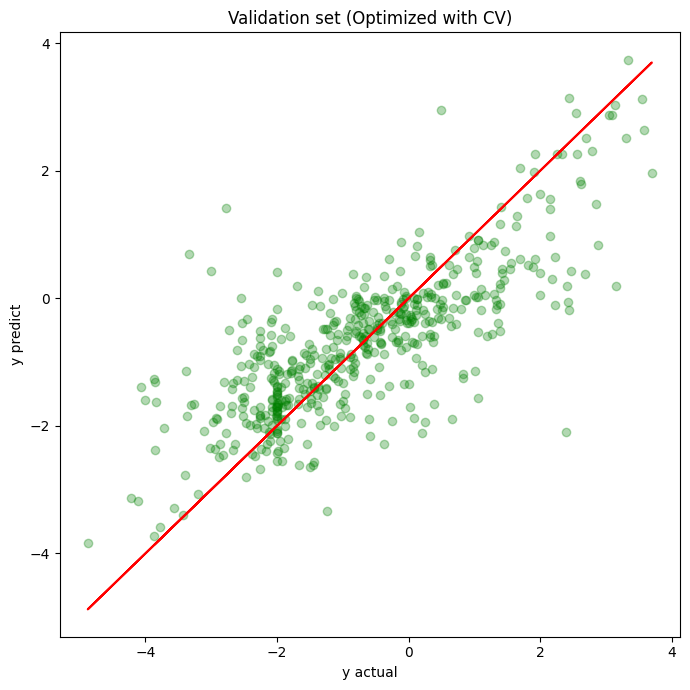

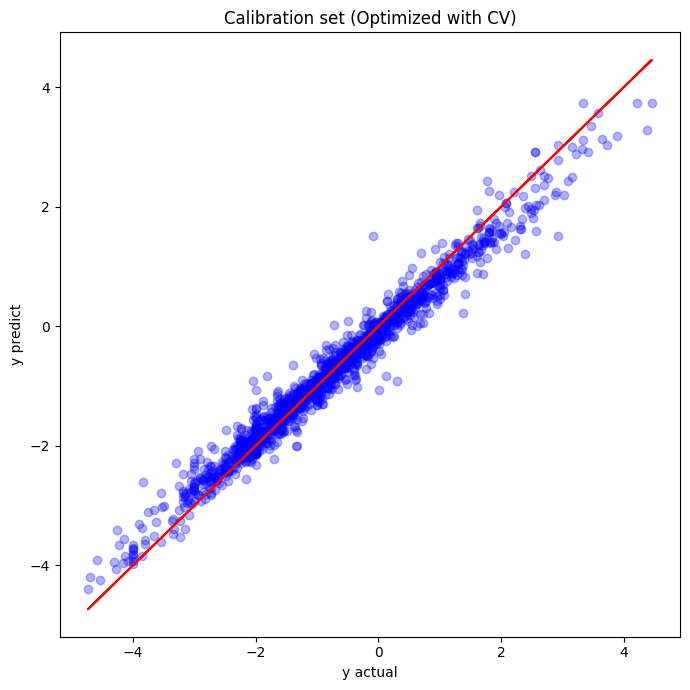

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(x=y_test_subset, y=y_pred_optimized_cv, c='green', alpha=0.3)
z_test = np.polyfit(y_test_subset, y_test_subset, 1)
p_test = np.poly1d(z_test)
plt.plot(y_test_subset, p_test(y_test_subset), 'red')
plt.title('Validation set (Optimized with CV)')
plt.ylabel('y predict')
plt.xlabel('y actual')
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 7))
plt.scatter(x=y_train_subset, y=y_predc_optimized_cv, c='blue', alpha=0.3)
z_train = np.polyfit(y_train_subset, y_train_subset, 1)
p_train = np.poly1d(z_train)
plt.plot(y_train_subset, p_train(y_train_subset), 'red')
plt.title('Calibration set (Optimized with CV)')
plt.ylabel('y predict')
plt.xlabel('y actual')
plt.tight_layout()
plt.show()